In [1]:
from rdflib import Graph
from SPARQLWrapper import SPARQLWrapper, JSON, N3
from pprint import pprint 

### User input

In [7]:
goal = input('I want to learn about ')

I want to learn about artificial intelligence 


### Define Domain

In [8]:
sparql = SPARQLWrapper('https://dbpedia.org/sparql')
query = '''
    SELECT ?object
    WHERE {{ dbr:{0} dbo:abstract ?object .}} 
'''.format(goal.capitalize().replace(' ', '_'))
sparql.setQuery(query)
print(query)


    SELECT ?object
    WHERE { dbr:Artificial_intelligence_ dbo:abstract ?object .} 



### Print Summary

In [9]:
sparql.setReturnFormat(JSON)
qres = sparql.query().convert()

for result in qres['results']['bindings']:
    lang, value = result['object']['xml:lang'], result['object']['value']
    if lang == 'en':
        print(value)

In [10]:
type(value)

NameError: name 'value' is not defined

### Construct Generalized Curriculum Graph

In [14]:
sparql = SPARQLWrapper('https://dbpedia.org/sparql')
sparql.setQuery('''
CONSTRUCT { dbc:Artificial_intelligence skos:broader ?parent .
            dbc:Artificial_intelligence skos:narrower ?child .}
WHERE {
    { dbc:Artificial_intelligence skos:broader ?parent .}
UNION 
    { ?child skos:broader dbc:Artificial_intelligence .}
}
''')

sparql.setReturnFormat(N3)
qres = sparql.query().convert()

g = Graph()
g.parse(data=qres, format='n3')
g_str = g.serialize(format='ttl').decode('u8')
print(g_str)

@prefix dbc: <http://dbpedia.org/resource/Category:> .
@prefix skos: <http://www.w3.org/2004/02/skos/core#> .

dbc:Artificial_intelligence skos:broader dbc:Cognitive_science,
        dbc:Computational_neuroscience,
        dbc:Cybernetics,
        dbc:Emerging_technologies,
        dbc:Formal_sciences,
        dbc:Intelligence_by_type,
        dbc:Personhood,
        dbc:Subfields_of_computer_science ;
    skos:narrower dbc:AI_accelerators,
        dbc:Affective_computing,
        dbc:Argument_technology,
        dbc:Artificial_immune_systems,
        dbc:Artificial_intelligence_applications,
        dbc:Artificial_intelligence_associations,
        dbc:Artificial_intelligence_conferences,
        dbc:Artificial_intelligence_in_fiction,
        dbc:Artificial_intelligence_laboratories,
        dbc:Artificial_intelligence_publications,
        dbc:Artificial_intelligence_researchers,
        dbc:Automated_reasoning,
        dbc:Chatbots,
        dbc:Cloud_robotics,
        dbc:Cognitive

### Data Wrangling

In [15]:
import re 

arr = re.split(',|;|dbc:|skos:', g_str.replace('\n', '').replace(' ', '').replace('.', ''))
# print(arr)
# print('---------------------\n')
topic_list = [x for x in arr if 'http' not in x and x != '']    
broad_idx = topic_list.index('broader')
narrow_idx = topic_list.index('narrower')
main_topic = topic_list[1].replace('_', ' ')
broad = [x.replace('_', ' ') for x in topic_list if topic_list.index(x) > broad_idx and topic_list.index(x) < narrow_idx]
narrow = [x.replace('_', ' ') for x in topic_list if topic_list.index(x) > narrow_idx]

# print('\nbroad\n---------------------')
# for a in broad:
#     print(a)
print('\nnarrow\n---------------------')
for a in narrow:
    print(a) 


narrow
---------------------
AI accelerators
Affective computing
Argument technology
Artificial immune systems
Artificial intelligence applications
Artificial intelligence associations
Artificial intelligence conferences
Artificial intelligence in fiction
Artificial intelligence laboratories
Artificial intelligence publications
Artificial intelligence researchers
Automated reasoning
Chatbots
Cloud robotics
Cognitive architecture
Computer vision
Evolutionary computation
Existential risk from artificial general intelligence
Fictional artificial intelligences
Fuzzy logic
Game artificial intelligence
History of artificial intelligence
Knowledge engineering
Knowledge representation
Logic programming
Machine learning
Multi-agent systems
Neural network data exchange formats
Open-source artificial intelligence
Philosophy of artificial intelligence
Robotics
Robots
Rule engines
Signal processing conferences
Turing tests
Virtual assistants


### Network representation of goal and domain template

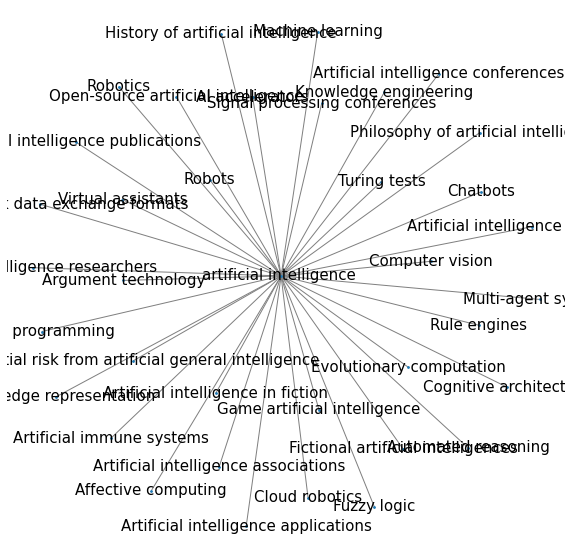

In [16]:
# plot network

import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline 
G = nx.Graph()
G.add_node(goal)
G.add_edges_from([(goal,a) for a in narrow[0:]])
fig, ax = plt.subplots(figsize=(10, 10))
nx.draw_spring(G,
                 font_size=15,
                 width=1,
                 node_size=3,
                 edge_color='grey',
                 with_labels = True,
                 ax=ax)

### Web Scraping (Google search)
- googlesearch-python

In [7]:
import requests
import bs4
from googlesearch import search

top_10 = search(main_topic, num_results=10, lang='en')
for j in top_10:
    print(j)
    print('\n')

https://www.sas.com/en_us/insights/analytics/machine-learning.html


https://www.sas.com/en_us/insights/analytics/machine-learning.html


https://en.wikipedia.org/wiki/Machine_learning


https://www.coursera.org/learn/machine-learning


https://www.expert.ai/blog/machine-learning-definition/


https://developers.google.com/machine-learning/crash-course


https://www.geeksforgeeks.org/machine-learning/


https://searchenterpriseai.techtarget.com/definition/machine-learning-ML


https://www.ibm.com/cloud/learn/machine-learning


https://aws.amazon.com/machine-learning/


/search?q=Machine+learning&num=11&hl=en&tbm=isch&source=iu&ictx=1&fir=jJagNU8tZ2wF4M%252CBwMswl4yZQIR8M%252C%252Fm%252F01hyh_&vet=1&usg=AI4_-kSmU5QY08UZxOW_nEGPvrI9hFr2gA&sa=X&ved=2ahUKEwjH-KvFipvxAhV0MX0KHZ0VCdcQ_B16BAgyEAE#imgrc=jJagNU8tZ2wF4M




### Web Scraping (Extract Text)
- beautifulsoup4

In [10]:
def extract_text(url):
    pass
    # TODO: Write methods to extract text from a given url 

### Relevance Algorithm 1: Word Frequency 

In [11]:
def extract_word_count(page, word):
    pass
    # TODO: write method to scrape number of words in a text

### Relevance Algorithm 2: Co-occurance 
- textnets

In [12]:
def extract_co_occurance(page, word):
    pass
    # TODO: write method to extract co-occurance matrix from a text

### Explore Domain 

In [13]:
sparql = SPARQLWrapper('https://dbpedia.org/sparql')
sparql.setQuery('''
    SELECT ?object
    WHERE { dbr:Natural_language_processing dbo:wikiPageWikiLink ?object .} 
''')

sparql.setReturnFormat(JSON)
qres = sparql.query().convert()
#     print(qres)

for result in qres['results']['bindings']:
    print(result['object']['value'])

http://dbpedia.org/resource/AI-complete
http://dbpedia.org/resource/ALPAC
http://dbpedia.org/resource/Category:Natural_language_processing
http://dbpedia.org/resource/Machine_learning
http://dbpedia.org/resource/Controlled_natural_language
http://dbpedia.org/resource/Coreference
http://dbpedia.org/resource/Corpus_linguistics
http://dbpedia.org/resource/Value_(mathematics)
http://dbpedia.org/resource/Probabilistic_context-free_grammar
http://dbpedia.org/resource/Semantic_role_labeling
http://dbpedia.org/resource/Semi-supervised_learning
http://dbpedia.org/resource/Speech_segmentation
http://dbpedia.org/resource/Statistical_machine_translation
http://dbpedia.org/resource/Text_segmentation
http://dbpedia.org/resource/Foreign_language_writing_aid
http://dbpedia.org/resource/Seq2seq
http://dbpedia.org/resource/Grammar_induction
http://dbpedia.org/resource/Pro-drop_language
http://dbpedia.org/resource/Punctuation
http://dbpedia.org/resource/Question_answering
http://dbpedia.org/resource/Spee